In [1]:
print("JAI SHREE RAM")

JAI SHREE RAM


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# defining function to assign the data points to closest centroids
# here idx will return the array of the size of x i.e our input with number from 0 to k-1 i.e 1 from the point close to 2nd centroid like this
# go through a dry run for greater understanding
def find_closest_centroid(x,centroids):
    k= centroids.shape[0]
    print(f"K= {k}")
    idx=np.zeros(x.shape[0],dtype=int)
    for i in range(x.shape[0]):
        distance=[]
        for j in range(centroids.shape[0]):
             norm_ij=np.linalg.norm(x[i]-centroids[j])
             distance.append(norm_ij)
        idx[i]=np.argmin(distance)
    return idx        

In [4]:
def compute_new_centroidpos(x,idx,K):
    m,n= x.shape
    centroids=np.zeros((K,n))
    for k in range(K):
        points=x[idx==k]             # considering points who are ssinged to that centroid
        centroids[k]=np.mean(points,axis=0)
    return centroids

In [5]:
# running the kmeans
def run_kMeans(X,initial_centroids,max_iters=10):
    m,n=X.shape  # m x n i.e row x coloumns e.g [[1,2],[2,4],[2,3]]  here shape=(3,2) as 3 rows and 2 columns
    k=initial_centroids.shape[0]
    centroids=initial_centroids
    previous_ctr=centroids
    idx=np.zeros(m)  # as their are m exmaples 
    for i in range(max_iters):
         # For each example in X, assign it to the closest centroid
        idx=find_closest_centroid(X,centroids)
        # compute new centroids
        centroids=compute_new_centroidpos(X,idx,k)
    return centroids, idx
        

In [6]:
# to initialize the centroids the goob strategy is to use any random points form the dataset 
def Kmean_init_centroids(X,K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    return centroids

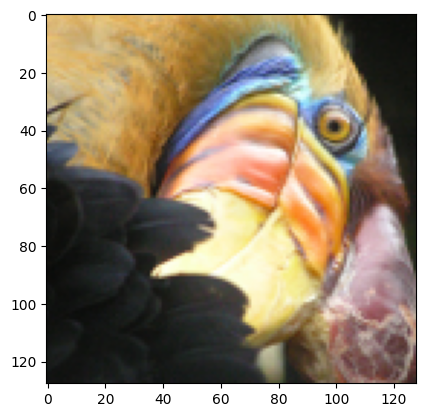

In [7]:
# reading the image 
original_img=plt.imread('bird_small.png')
plt.imshow(original_img)

In this exercise, you will apply K-means to image compression.

In a straightforward 24-bit color representation of an image
, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.
By making this reduction, it is possible to represent (compress) the photo in an efficient way.
Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).
In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.

Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

In [8]:
print(f"Shape of th img: {original_img.shape}")

Shape of th img: (128, 128, 3)


the first two indices identify a pixel position, and
the third index represents red, green, or blue.

In [9]:
# # Divide by 255 so that all values are in the range 0 - 1
original_img=original_img/255
# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [10]:
# running the alogrithm
k=16
max_iters=10
initial_centroids=Kmean_init_centroids(X_img,k)
print(initial_centroids[:5])

[[0.00387543 0.00373702 0.00298347]
 [0.00044598 0.00038447 0.00033833]
 [0.00389081 0.00381392 0.00326028]
 [0.00023068 0.00027682 0.00023068]
 [0.00069204 0.00076894 0.0007228 ]]


In [13]:
centroids,idx=run_kMeans(X_img,initial_centroids,max_iters)
print(f"Shape of idx: {idx.shape}")
print(f"Some points corresponding centroid idx: {idx[2:]}")

K= 16
K= 16
K= 16
K= 16
K= 16
K= 16
K= 16
K= 16
K= 16
K= 16
Shape of idx: (16384,)
Some points corresponding centroid idx: [14 14 14 ... 12 12 12]


In [12]:
# representing th eimag ein terms of the indices
x_recover=centroids[idx,:]
# Reshape recovered image into proper dimensions
x_recover=np.reshape(x_recover,original_img.shape)

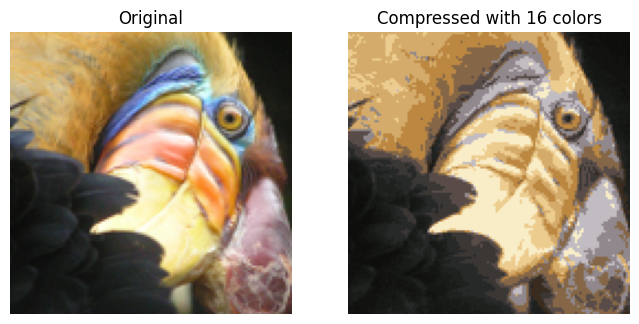

In [19]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(x_recover*255)
ax[1].set_title('Compressed with 16 colors')
ax[1].set_axis_off()
plt.savefig("Before_After_img.png")